# LAB | Ensemble Methods

## Personnal notes beforehand

**ACHTUNG**: <br>

Since our target is categorical, the lab should be the same, but on the Classifier mode, not the Regressor one

One should replace all the Regressor things for Classifier (work in progress)

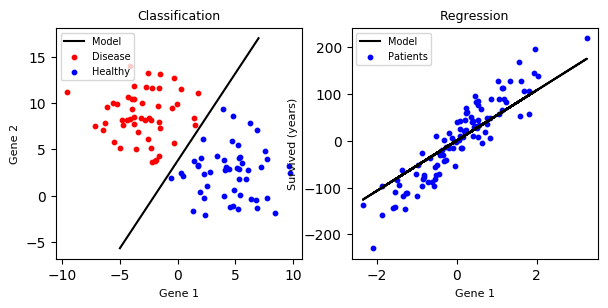

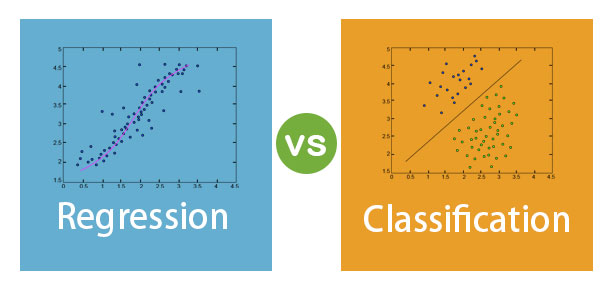

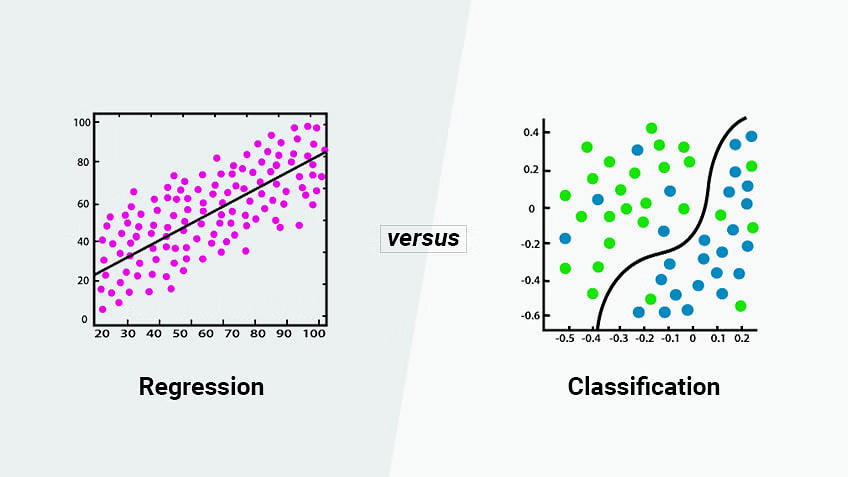

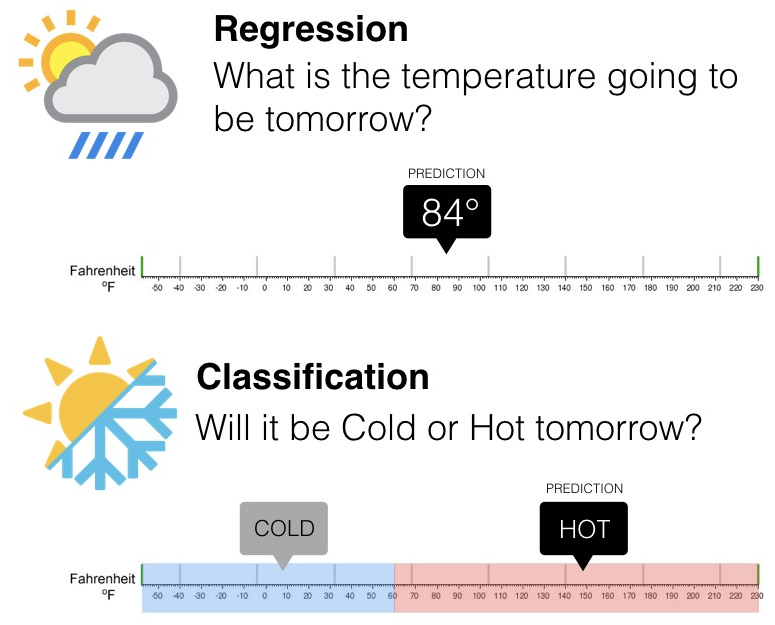

--> Having a look at to know/use the best classifier method / what classifier I want to use

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

## Moving on the to lab

### **Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In this Lab, you should try different ensemble methods in order to see if can obtain a better model than before. In order to do a fair comparison, you should perform the same feature scaling, engineering applied in previous Lab.

In [ ]:
#Libraries
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report

In [ ]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Now perform the same as before:
- Feature Scaling
- Feature Selection


In [ ]:
#your code here
print(spaceship.shape)

(8693, 14)


Let's skip the EDA part. For it, go back to lab 1 or 2

### Quick cleaning

In [ ]:
# Deleting all the rows with at least one missing value:
spaceship.dropna(inplace = True)

In [ ]:
# improving Cabin Column by creating a cabin_Level column (cf lab 2)
spaceship['Cabin_Level'] = spaceship['Cabin'].str[0]

display(spaceship['Cabin_Level'])

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin_Level, Length: 6606, dtype: object

In [ ]:
# Droping the 'PassengerId' and 'Name' columns
spaceship = spaceship.drop(columns=['PassengerId', 'Name'])

print(spaceship)

     HomePlanet CryoSleep     Cabin    Destination   Age    VIP  RoomService  \
0        Europa     False     B/0/P    TRAPPIST-1e  39.0  False          0.0   
1         Earth     False     F/0/S    TRAPPIST-1e  24.0  False        109.0   
2        Europa     False     A/0/S    TRAPPIST-1e  58.0   True         43.0   
3        Europa     False     A/0/S    TRAPPIST-1e  33.0  False          0.0   
4         Earth     False     F/1/S    TRAPPIST-1e  16.0  False        303.0   
...         ...       ...       ...            ...   ...    ...          ...   
8688     Europa     False    A/98/P    55 Cancri e  41.0   True          0.0   
8689      Earth      True  G/1499/S  PSO J318.5-22  18.0  False          0.0   
8690      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False          0.0   
8691     Europa     False   E/608/S    55 Cancri e  32.0  False          0.0   
8692     Europa     False   E/608/S    TRAPPIST-1e  44.0  False        126.0   

      FoodCourt  ShoppingMall     Spa  

In [ ]:
# Transforming floats to any column being an integer
import numpy as np
for column in spaceship.columns:
  if spaceship[column].dtype == np.float64:
    spaceship[column] = spaceship[column].astype(int)



print(spaceship.head(3))

  HomePlanet CryoSleep  Cabin  Destination  Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e   39  False            0   
1      Earth     False  F/0/S  TRAPPIST-1e   24  False          109   
2     Europa     False  A/0/S  TRAPPIST-1e   58   True           43   

   FoodCourt  ShoppingMall   Spa  VRDeck  Transported Cabin_Level  
0          0             0     0       0        False           B  
1          9            25   549      44         True           F  
2       3576             0  6715      49        False           A  


### Dummy Variables

In [ ]:
# Convert non-numerical columns into dummy variables
df_dummies = pd.get_dummies(spaceship, columns=['HomePlanet', 'Destination', 'Cabin_Level'])
df_dummies.sample(5)

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_Level_A,Cabin_Level_B,Cabin_Level_C,Cabin_Level_D,Cabin_Level_E,Cabin_Level_F,Cabin_Level_G,Cabin_Level_T
4797,False,F/981/S,24,False,0,464,321,0,90,True,...,False,True,False,False,False,False,False,True,False,False
2294,False,D/83/S,42,False,999,0,49,0,11,False,...,False,True,False,False,False,True,False,False,False,False
3399,False,F/690/S,17,False,0,432,0,3003,0,False,...,False,True,False,False,False,False,False,True,False,False
8464,False,F/1751/S,21,False,1410,3,49,0,0,False,...,False,False,False,False,False,False,False,True,False,False
7883,False,G/1374/P,24,False,0,171,591,22,0,False,...,False,True,False,False,False,False,False,False,True,False


### **Perform Train Test Split**

In [ ]:
# let's define our features:
features = df_dummies[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]]
features

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,0,0,0
1,109,9,25,549,44
2,43,3576,0,6715,49
3,0,1283,371,3329,193
4,303,70,151,565,2
...,...,...,...,...,...
8688,0,6819,0,1643,74
8689,0,0,0,0,0
8690,0,0,1872,1,0
8691,0,1049,0,353,3235


In [ ]:
# defining our target
target = spaceship[["Transported"]]
target

,Transported
0,False
1,True
2,False
3,False
4,True
...,...
8688,False
8689,False
8690,True
8691,False


In [ ]:
# launching the Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### *Normalizing / Scaling our data*

In [ ]:
# Before moving on to the model selection , let's first normalize / standardize our data points

normalizer = MinMaxScaler()

In [ ]:
# Fit it to our training data:
normalizer.fit(X_train)

MinMaxScaler()

In [ ]:
# Transforming our training and testing data
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.007916,0.000000,0.051276,0.000000
3,0.00131,0.000000,0.046111,0.016378,0.000049
4,0.00000,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.000000,0.0,0.00000,0.0
1,0.0,0.000000,0.0,0.00000,0.0
2,0.0,0.000000,0.0,0.00000,0.0
3,0.0,0.000000,0.0,0.00000,0.0
4,0.0,0.054775,0.0,0.07774,0.0


### **Model Selection**

Now you will try to apply different ensemble methods in order to get a better model

- Bagging and Pasting

Lesson Reminder: Bagging involves training multiple instances of the same base model on different subsets of the training data. The final prediction is obtained by averaging or voting over predictions from these models.

In [ ]:
# Defining our bagging reggresor based on Decision Tree
bagging_cla = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [ ]:
# Chat GPT Explanation: undestand the parameters for BaggingClassifier(--------------)
'''
base_estimator: This parameter specifies the base estimator to be used.
In your case, you're using DecisionTreeRegressor(max_depth=20), which means
each individual estimator (or base model) within the ensemble is a decision tree regressor with a maximum depth of 20.

n_estimators: This parameter specifies the number of base estimators in the ensemble.
You're setting it to 100, meaning your bagging regressor will consist of 100 decision tree regressors.

max_samples: This parameter specifies the number of samples to draw from the training dataset to train each base estimator.
You're setting it to 1000, meaning each decision tree regressor will be trained on a random sample of 1000 data points
drawn with replacement from the training dataset.

'''

"\nbase_estimator: This parameter specifies the base estimator to be used.\nIn your case, you're using DecisionTreeRegressor(max_depth=20), which means\neach individual estimator (or base model) within the ensemble is a decision tree regressor with a maximum depth of 20.\n\nn_estimators: This parameter specifies the number of base estimators in the ensemble.\nYou're setting it to 100, meaning your bagging regressor will consist of 100 decision tree regressors.\n\nmax_samples: This parameter specifies the number of samples to draw from the training dataset to train each base estimator.\nYou're setting it to 1000, meaning each decision tree regressor will be trained on a random sample of 1000 data points\ndrawn with replacement from the training dataset.\n\n"

In [ ]:
# Training Bagging model with our normalized data
bagging_cla.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [ ]:
# Evaluate model's performance
bagging_cla.fit(X_train_norm, y_train)
pred_bagg = bagging_cla.predict(X_test_norm)

print(classification_report(y_test, pred_bagg))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

       False       0.82      0.73      0.77       661
        True       0.76      0.84      0.79       661

    accuracy                           0.78      1322
   macro avg       0.79      0.78      0.78      1322
weighted avg       0.79      0.78      0.78      1322



- Random Forests

While in Bagging/Pasting, we randomize the training data that each predictor (estimator) learns from.

However, in a Random Patches Method, we go a step further by also randomizing the features that each predictor trains with.

In [ ]:
# Initialize a Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=20)

In [ ]:
# Training the model
forest.fit(X_train_norm, y_train)

<ipython-input-89-4697723dbe64>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=20)

In [ ]:
# Evaluate the model
pred_forest = forest.predict(X_test_norm)

In [ ]:
#fitting the model +defining the y_pred (= pred_forest )
forest.fit(X_train_norm, y_train)
pred_forest = forest.predict(X_test_norm)

<ipython-input-91-97fa55219323>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [ ]:
#classification report
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

       False       0.81      0.74      0.77       661
        True       0.76      0.82      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



- Gradient Boosting

In [ ]:
# Initialize an GB  model
gb_cla = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

In [ ]:
# Training the model
gb_cla.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingClassifier(max_depth=20)

In [ ]:
# Evaluate the model
pred_gb = gb_cla.predict(X_test_norm)

In [ ]:
#classification report
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

       False       0.79      0.68      0.73       661
        True       0.72      0.82      0.77       661

    accuracy                           0.75      1322
   macro avg       0.76      0.75      0.75      1322
weighted avg       0.76      0.75      0.75      1322



- Adaptive Boosting

In [ ]:
# Initialize an AdaBoost model
adaboost_cla = AdaBoostClassifier(random_state=0, n_estimators=100)

In [ ]:
#fitting the model
adaboost_cla.fit(X_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
# Evaluate the model
pred_ada = adaboost_cla.predict(X_test_norm)
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

       False       0.82      0.71      0.76       661
        True       0.74      0.85      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322



Logitsic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='ovr')
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
lr.score(X_test, y_test)


from sklearn.metrics import classification_report

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

       False       0.84      0.66      0.74       661
        True       0.72      0.87      0.79       661

    accuracy                           0.77      1322
   macro avg       0.78      0.77      0.77      1322
weighted avg       0.78      0.77      0.77      1322



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



About confusion Matrux:

`https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html`

<Axes: >

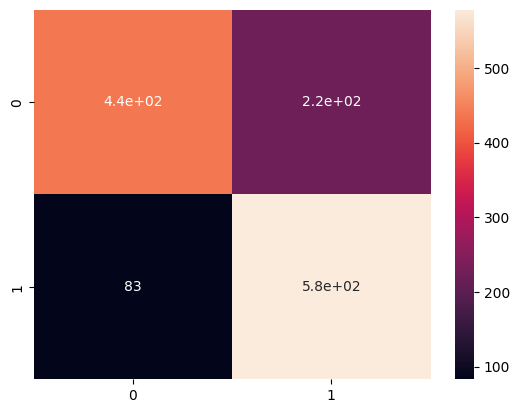

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True)

In [ ]:
import plotly.express as px
px.imshow(confusion_matrix(y_test, pred_lr), text_auto=True)

#Issue: I should come back to it later

Which model is the best and why?

In [ ]:
#GLOBAL OVERVIEW

# Bagging and Pasting
print(classification_report(y_test, pred_bagg))

# Random Forests
print(classification_report(y_test, pred_forest))

# Gradient Boosting
print(classification_report(y_test, pred_gb))

# Adaptive Boosting
print(classification_report(y_test, pred_ada))

# Logitsic regression

print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

       False       0.82      0.73      0.77       661
        True       0.76      0.84      0.79       661

    accuracy                           0.78      1322
   macro avg       0.79      0.78      0.78      1322
weighted avg       0.79      0.78      0.78      1322

              precision    recall  f1-score   support

       False       0.81      0.74      0.77       661
        True       0.76      0.82      0.79       661

    accuracy                           0.78      1322
   macro avg       0.78      0.78      0.78      1322
weighted avg       0.78      0.78      0.78      1322

              precision    recall  f1-score   support

       False       0.79      0.68      0.73       661
        True       0.72      0.82      0.77       661

    accuracy                           0.75      1322
   macro avg       0.76      0.75      0.75      1322
weighted avg       0.76      0.75      0.75      1322

              preci

**ChatGPT Explanations:**

<br>

***ACHTUNG: these explanations were made on the Regressot things, before I change evrything to Classifier***

<br> <br>


For Linear Regression:

Mean Absolute Error (MAE) is approximately 0.44.
Root Mean Squared Error (RMSE) is around 0.46.
R2 score is about 0.15, indicating that the model explains only 15% of the variance in the data.
For Bagging and Pasting:

MAE is approximately 0.32.
RMSE is around 0.40.
R2 score is about 0.36, indicating that the model explains 36% of the variance in the data.
For Random Forests:

MAE is approximately 0.31.
RMSE is around 0.41.
R2 score is about 0.34, indicating that the model explains 34% of the variance in the data.
For Gradient Boosting:

MAE is approximately 0.32.
RMSE is around 0.47.
R2 score is about 0.11, indicating that the model explains only 11% of the variance in the data.
For Adaptive Boosting:

MAE is approximately 0.38.
RMSE is around 0.42.
R2 score is about 0.11, indicating that the model explains only 11% of the variance in the data.
For Decision Tree:

MAE is approximately 0.32.
RMSE is around 0.44.
R2 score is about 0.19, indicating that the model explains 19% of the variance in the data.
For Logistic Regression:

Precision, recall, F1-score, and accuracy metrics are provided in the classification report.

The model seems to perform reasonably well with an accuracy of 0.77.

Overall, it seems like Bagging and Pasting, as well as Random Forests, perform relatively better compared to the other models, based on the provided evaluation metrics.

Determining the "best" model depends on various factors, including the specific goals of your project, the nature of the dataset, and the trade-offs between different evaluation metrics. However, based on the provided evaluation metrics:

Bagging and Pasting and Random Forests seem to perform relatively better than the other models in terms of MAE, RMSE, and R2 score. They both have lower MAE and RMSE values compared to other models, indicating better accuracy in prediction. Additionally, they have higher R2 scores, suggesting that they explain a larger proportion of the variance in the data.

Logistic Regression also performs well in terms of classification metrics, with relatively high precision, recall, and F1-score for both classes. It achieves an accuracy of 0.77, indicating good performance in classifying the target variable.

If computational resources are not a concern, using an ensemble method like Random Forests might be preferable due to its robustness and ability to handle complex datasets. However, if interpretability is essential or if computational efficiency is a concern, Logistic Regression could be a good choice.

In summary, the choice of the "best" model depends on your specific requirements, such as interpretability, computational resources, and the importance of different evaluation metrics. It's essential to consider these factors when selecting the most suitable model for your particular task.

## Sabina Recap for Metrics / interpretation

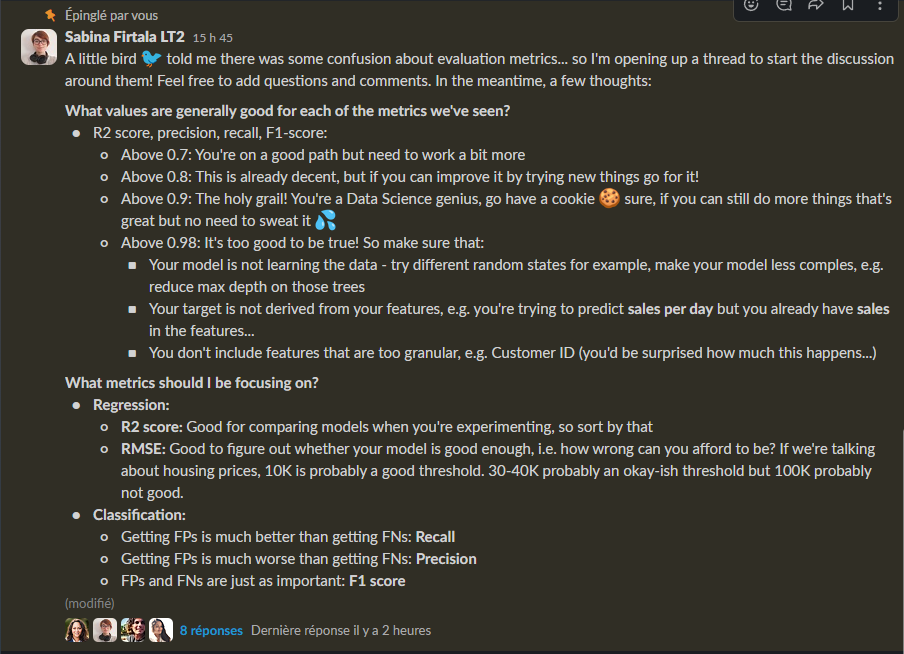

In [ ]:
'''
SLACK : HELP FROM SABINA


[What values are generally good for each of the metrics we've seen ?]

R2 score, precision, recall, F1-score:
  > Above 0.7: You're on a good path but need to work a bit more
  > Above 0.8: This is already decent, but if you can improve it by trying new things go for it!
  > Above 0.9: The holy grail! You're a Data Science genius, go have a cookie :cookie: sure, if you can still do more things that's great but no need to sweat it :gouttes_de_sueur:
  > Above 0.98: It's too good to be true! So make sure that:
        - Your model is not learning the data - try different random states for example, make your model less comples, e.g. reduce max depth on those trees
        - Your target is not derived from your features, e.g. you're trying to predict sales per day but you already have sales in the features...
        - You don't include features that are too granular, e.g. Customer ID (you'd be surprised how much this happens...)



[What metrics should I be focusing on ?]

Regression:
  > R2 score: Good for comparing models when you're experimenting, so sort by that
  > RMSE: Good to figure out whether your model is good enough, i.e. how wrong can you afford to be? If we're talking about housing prices, 10K is probably a good threshold. 30-40K probably an okay-ish threshold but 100K probably not good.

Classification:

> Getting FPs is much better than getting FNs: Recall
> Getting FPs is much worse than getting FNs: Precision
> FPs and FNs are just as important: F1 score


'''

## Pycaret tries:  Do not pay attention

Info: Code based on the following NB:
<br>
https://colab.research.google.com/drive/1W-LThXElbL39bhVamTgFzOzLbE0FKh2_?usp=sharing

In [ ]:
# pip install pycaret

In [ ]:
# concatenate is_unwanted users and 1000 randomly selected wanted users
dataset = pd.concat([dataset[dataset['Transported']==0].sample(1000),
                     dataset[dataset['Transported']==1]])
dataset['is_unwanted'].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_unseen = train_test_split(dataset,
                                                 test_size=0.2,
                                                 stratify=dataset['Transported'])

In [ ]:
from pycaret.classification import compare_models
from pycaret.classification import setup

In [ ]:
xp = setup(data = ,
           test_data = ,
           target = "",
           normalize = True ,
           session_id = 42)

In [ ]:
best_model = compare_models()

In [ ]:
from pycaret.classification import plot_model

plot_model(best_model, plot='confusion_matrix')

In [ ]:
from pycaret.classification import tune_model

best_model_tuned = tune_model(best_model)

## Pingouin  Do not pay attention

`https://pingouin-stats.org/build/html/index.html`

In [ ]:
# ! pip install pingouin

In [ ]:
import numpy as np
import pingouin as pg